In [1]:
import uproot
import ROOT

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

Welcome to JupyROOT 6.14/00


In [49]:
from collections import OrderedDict

trees = OrderedDict({
    0.1 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-1p20e-03_100k.root')['TRIG_muTrackEffi/trigEffiForMuTrack'],
      1 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-0p012_100k.root')['TRIG_muTrackEffi/trigEffiForMuTrack']   ,
     10 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-0p12_100k.root')['TRIG_muTrackEffi/trigEffiForMuTrack']    ,
     50 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-0p6_100k.root')['TRIG_muTrackEffi/trigEffiForMuTrack']     ,
    100 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-1p2_100k.root')['TRIG_muTrackEffi/trigEffiForMuTrack']     ,
    300 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-3p6_100k.root')['TRIG_muTrackEffi/trigEffiForMuTrack']     
})

In [18]:
tree[1].keys()

[b'fired', b'pt', b'eta', b'phi']

Text(0.5,0,'$p_{T}$ [GeV]')

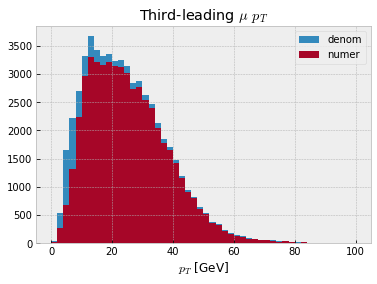

In [90]:
t = trees[1]
pt = t.array('pt')
start = pt.starts
denom = pt.content[start+2]
fd = t.array('fired')
numer = pt.content[start[fd]+2]
fig,ax = plt.subplots()
ax.hist(denom, bins=50, range=(0,100), label='denom')
ax.hist(numer, bins=50, range=(0,100), label='numer')
ax.legend(loc='best')
ax.set_title('Third-leading $\mu$ $p_{T}$')
ax.set_xlabel('$p_{T}$ [GeV]')

In [79]:
import numpy as np

def extract_teffi(eff):
    _ = ROOT.TCanvas()
    eff.Draw()
    ROOT.gPad.Update()
    
    tot = eff.GetTotalHistogram()
    nBins = tot.GetNbinsX()
    xx = np.array([tot.GetXaxis().GetBinCenter(i)                 for i in range(1, nBins+1)])
    yy = np.array([eff.GetEfficiency(eff.GetGlobalBin(i))         for i in range(1, nBins+1)])
    yl = np.array([eff.GetEfficiencyErrorLow(eff.GetGlobalBin(i)) for i in range(1, nBins+1)])
    yu = np.array([eff.GetEfficiencyErrorUp(eff.GetGlobalBin(i))  for i in range(1, nBins+1)])
    
    return {'x': xx,
            'y': yy,
            'yerr': np.array([yu, yl])}

Trigger `HLT_TrkMu16_DoubleTrkMu6NoFiltersNoVtx_v10` Efficiency as a function of third leading $\mu$ $p_{T}$

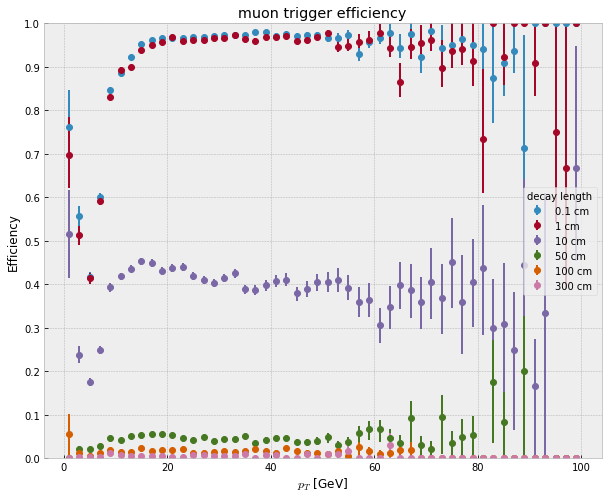

In [87]:
fig,ax = plt.subplots(figsize=(10,8))

for k, t in trees.items():
    d = t.array('pt')
    start = d.starts
    denom = d.content[start+2]
    fd = t.array('fired')
    numer = d.content[start[fd]+2]
    
    h0 = ROOT.TH1F(f'h0_{k}', '', 50, 0, 100)
    h1 = ROOT.TH1F(f'h1_{k}', '', 50, 0, 100)
    for x in np.nditer(denom): h0.Fill(x)
    for x in np.nditer(numer): h1.Fill(x)
        
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)

    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt='o', label=f'{k} cm')
    
ax.set_title('muon trigger efficiency')
ax.set_xlabel('$p_{T}$ [GeV]')
ax.set_ylabel('Efficiency')
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylim((0,1))
ax.legend(loc='best', title='decay length')

Trigger `HLT_TrkMu16_DoubleTrkMu6NoFiltersNoVtx_v10` Efficiency as a function of third leading $\mu$ $\eta$

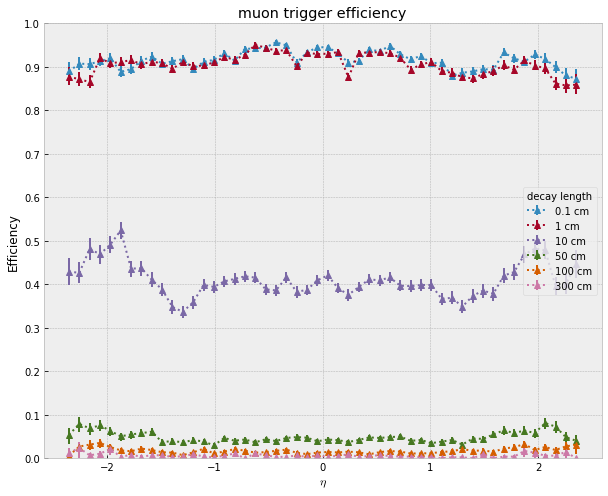

In [84]:
fig,ax = plt.subplots(figsize=(10,8))

for k, t in trees.items():
    d = t.array('eta')
    start = d.starts
    denom = d.content[start+2]
    fd = t.array('fired')
    numer = d.content[start[fd]+2]
    
    h0 = ROOT.TH1F(f'h0_{k}', '', 50, -2.4, 2.4)
    h1 = ROOT.TH1F(f'h1_{k}', '', 50, -2.4, 2.4)
    for x in np.nditer(denom): h0.Fill(x)
    for x in np.nditer(numer): h1.Fill(x)
        
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)

    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt='^:', label=f'{k} cm')
    
ax.set_title('muon trigger efficiency')
ax.set_xlabel('$\eta$')
ax.set_ylabel('Efficiency')
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylim((0,1))
ax.legend(loc='best', title='decay length')